# loading R 

In [1]:
%load_ext rpy2.ipython

# loading CSV file

In [10]:
import pandas as pd

df = pd.read_csv('./data/qualtrics/Topic_Item_Assessment_June+17,+2024_19.34.csv').iloc[2:].reset_index().drop(columns=['index'])
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,doc5,model,topic_id,NPMI,usefulness_first,slider,slider_lower,slider_upper,neg_val_question,neg_val_text
0,2024-06-17 06:26:52,2024-06-17 06:36:56,IP Address,174.230.146.151,100,603,True,2024-06-17 06:36:57,R_1Ehp5LqI4rmHoLs,NaN,...,for anyone who's ever asked me where i possibl...,scholar,8,0.1104356061554188,False,fifty,46,59,expect,I would<strong> not expect</strong> to see the...
1,2024-06-17 06:26:37,2024-06-17 06:40:30,IP Address,24.92.36.242,100,833,True,2024-06-17 06:40:31,R_7gHJwxVKd9P39rs,NaN,...,Without. a. doubt. THiS cake was THE BEST birt...,lda,13,0.0322320157187325,False,sixty,56,69,clear,It is <strong>not clear</strong> why these doc...
2,2024-06-17 06:26:35,2024-06-17 06:41:40,IP Address,139.171.31.30,100,905,True,2024-06-17 06:41:41,R_5eOZsN5mpZWi8QF,NaN,...,these pictures are taken one year apart. aside...,bertopic,5,-0.0957887783836396,False,one hundred,96,101,clear,It is <strong>not clear</strong> why these doc...
3,2024-06-17 06:28:23,2024-06-17 06:41:48,IP Address,73.95.182.117,100,804,True,2024-06-17 06:41:49,R_1GZjhHMLR0GAtfM,NaN,...,"to the ones who are struggling,<br>the ones wh...",lda,12,0.0407211877032034,False,ninety,86,99,related_to_dataset,These documents are <strong>not related </stro...
4,2024-06-17 06:33:22,2024-06-17 06:43:50,IP Address,152.117.104.178,100,628,True,2024-06-17 06:43:51,R_3ozRqNNf6VWdlvJ,NaN,...,"We are $2,300 away from being able to fund TWO...",stm,3,0.0578591119527621,False,seventy,66,79,clear,It is <strong>not clear</strong> why these doc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2024-06-17 17:53:24,2024-06-17 17:54:56,IP Address,81.161.5.164,100,91,True,2024-06-17 17:54:57,R_3poKgpvh7jwPOm9,NaN,...,I've had a manic morning. Baby fed at 1.30am a...,scholar,13,-0.0457774936692595,False,twenty,16,29,clear,It is <strong>not clear</strong> why these doc...
79,2024-06-17 17:21:04,2024-06-17 18:00:56,IP Address,176.46.146.141,100,2391,True,2024-06-17 18:00:57,R_6vGOzfE5sEqpSi5,NaN,...,"at the end of the day, this is your life and y...",bertopic,9,0.2121661276436667,False,thirty,26,39,expect,I would<strong> not expect</strong> to see the...
80,2024-06-17 18:12:47,2024-06-17 18:37:41,IP Address,68.98.241.222,100,1493,True,2024-06-17 18:37:41,R_7HSLYjwnwlNP8Ib,NaN,...,1:54am im getting sick. probably caught somet...,scholar,2,-0.0099138039220776,False,ninety,86,99,suprised_of_AI,I am <strong> not surprised </strong>that a co...
81,2024-06-17 18:57:21,2024-06-17 19:18:33,IP Address,47.230.33.107,100,1272,True,2024-06-17 19:18:34,R_3Nrxk6DPy3krKZb,NaN,...,I've had a manic morning. Baby fed at 1.30am a...,scholar,13,-0.0457774936692595,False,sixty,56,69,clear,It is <strong>not clear</strong> why these doc...


In [15]:
tdf = df[df.prolific_id_question=='6479ef255eeda61e229715e4']
tdf.neg_val_check_1,tdf.expect_1
# (datetime.datetime.strptime(row.EndDate,'%Y-%m-%d %H:%M:%S') - datetime.datetime.strptime(tdf.iloc[0].StartDate,'%Y-%m-%d %H:%M:%S')).seconds
#[['distinct_1', 'imagine_1', 'expect_1', 'unusual_1', 'clear_1', 'unrelated_1', 'coherent_1', 'offensive_1', 'meaningful_1', 'arbitrary_1', 'specific_perspective_1', 'confusing_1', 'one_theme_1', 'strange_1', 'general_theme_1', 'could_offend_1', 'easy_label_1', 'insight_1', 'one_randomly_added_1', 'new_way_of_thinking_1', 'neg_val_check_1', 'more_information_1', 'prefer_differently_1', 'agree_1', 'different_themes_1', 'specific_theme_1', 'do_not_fit_1', 'curious_to_know_more_1', 'emotion_1', 'label_consensus_1', 'missing_1', 'important_1', 'two_plus_random_1', 'sensible_1', 'biased_1', 'label_confident_1', 'related_to_corpus_1', 'influence_thinking_1']]

(52    68
 Name: neg_val_check_1, dtype: object,
 52    68
 Name: expect_1, dtype: object)

In [ ]:
#notes to consider
#This response 6613d855beaacc9c62ba9675 and 6479ef255eeda61e229715e4 took more time but provided good quality answers, consider not dropping it


number of data collected

In [11]:
df = df[df.prolific_id_question.str.len() > 5]
print('number of collected data: {0}'.format(len(df)))

number of collected data: 83


committment check

In [12]:
df = df[df.Commitment_question == 'Yes, I will.']
print('number of data after commitment check: {0}'.format(len(df)))

number of data after commitment check: 83


In [13]:
df = df[~pd.isna(df.set_slider_check_1)]
print('number of data after droping  slider_chek == Nan: {0}'.format(len(df)))

number of data after droping  slider_chek == Nan: 82


drop the ones who did not pass slider check

In [14]:
idx = []

df.set_slider_check_1 = df.set_slider_check_1.astype(int)
df.slider_upper = df.slider_upper.astype(int)
df.slider_lower = df.slider_lower.astype(int)

for i,row in df.iterrows():
    if row.set_slider_check_1>row.slider_upper or  row.set_slider_check_1<row.slider_lower:
        idx.append(i)


df = df.drop(idx)

print('number of data after slider check: {0}'.format(len(df)))

number of data after slider check: 82


dropping the ones who timed out!

In [15]:
import datetime

idx = []

wrong_time_outs = ['6613d855beaacc9c62ba9675','6479ef255eeda61e229715e4']

for i,row in df.iterrows():
    if (datetime.datetime.strptime(row.EndDate,'%Y-%m-%d %H:%M:%S') - datetime.datetime.strptime(row.StartDate,'%Y-%m-%d %H:%M:%S')).seconds > 3700:
        #skipping the list that Qualtrics said timeout but not Prolific
        if row.prolific_id_question in wrong_time_outs:
            continue #skip
        idx.append(i)

df = df.drop(idx)

print('number of data after timeout: {0}'.format(len(df)))

number of data after timeout: 81


list of people we should pay!

In [19]:
# df.sort_values('StartDate')
# df.iloc[147:]
# print(','.join(set(df.iloc[147:].prolific_id_question)))

In [16]:
print(','.join(set(df.prolific_id_question)))

65cf6dbbe3b7c1159d0364e9,666d61258a386185e18da5f8,66428090de7c2db3caed1c77,663a5fc5b458baec47c1b160,6665c6222d980c779a45e9a5,65e1e69cc010f4b4a1ef32e6,65e5a88bbbf79d273413f88a,663200f99991108a0c4dcb23,663fab7c4193c77a18d5f5a5,5fc1c035ac92312b4c2e6bab,65327a954fb10f7a6e444ae6,6154c1748e0de2c3afdab62c,5db4ef4a2986a3000be1f886,664bae9ae5900c0b842196f2,65983c0f2ea18792568bc3bc,61489a7c8f9dfcc9f78b7c36,663e681740ee374f8d488e51,65293fa9b73b0edd4fd93b95,5f0cc2ab16b21216d946574c,666fb9bd7be39c7cf0a85ef0,637d58b9dd14dc68ba68920a,63d15e1be853005ff591b935,5f79bca83a2eb65c0983816d,66605a391a913effac6190d6,66341aa2ba380c734a4bbf24,63ea4ab1ce4168cbe9f63775,666744fa4b033e071d5996c9,5c6d7db58f6257000148f61d,6659d01c220a87b46ab7ed06,5cd6c1197b871a0001b13589,64527c12fe9ceb65346c27bf,666c9de44f9efd7d991892b9,664bf2201abae3378784ee1a,6638ed323cd2400f1d2b09d4,63d41c2627381fc53af61e58,665f812e4bf9990e80bafb62,66548532974360d0c90b9dd5,6276d97e209059496d37bf74,65631b21aff167a83105c476,662282b15472e856f6b14e2b,

negative valence and Mars Check

In [8]:
neg_val_map = {'clear':'clear_1','related_to_dataset':'related_to_corpus_1',
              'suprised_of_AI':'suprised_of_AI_1','expect':'expect_1',}


import datetime

idx = []

for i,row in df.iterrows():
    val = 100-int(row.neg_val_check_1)
    check = int(row[neg_val_map[row.neg_val_question]])
    if (check-10>val or val>check+10) and (row.mars != 'Never') :
        idx.append(i)
        # print(row.neg_val_question,row.neg_val_check_1,row[neg_val_map[row.neg_val_question]])
        # print(row.mars)


df = df.drop(idx)

print('number of data after negative valence & Mars check: {0}'.format(len(df)))

number of data after negative valence & Mars check: 306


checking data distribution

/var/folders/86/nw630jn16nsg2zqycwy774640000gn/T/ipykernel_1050/662402430.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(df.usefulness_1))


<Axes: ylabel='Density'>

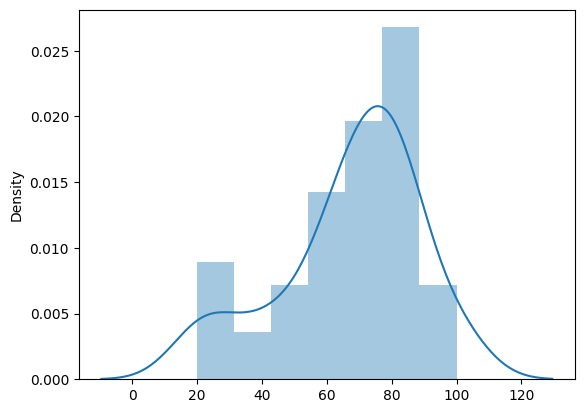

In [38]:
# df.topic_id,df.model
import seaborn as sns

sns.distplot(list(df.usefulness_1))

checking topic distribution

In [9]:
from collections import Counter

topic_dist = [i+str(j) for i,j in zip(list(df.model), \
                                    list(df.topic_id))]
Counter(topic_dist)

Counter({'lda1': 7,
         'lda2': 6,
         'scholar7': 6,
         'scholar0': 6,
         'scholar9': 6,
         'lda4': 6,
         'stm0': 5,
         'scholar3': 5,
         'lda0': 5,
         'stm8': 5,
         'scholar8': 5,
         'lda5': 5,
         'bertopic1': 5,
         'scholar5': 5,
         'bertopic12': 5,
         'lda10': 5,
         'scholar14': 5,
         'scholar12': 5,
         'lda7': 5,
         'lda13': 5,
         'stm13': 5,
         'bertopic7': 5,
         'lda6': 5,
         'bertopic15': 5,
         'lda12': 5,
         'lda11': 5,
         'lda14': 5,
         'scholar13': 5,
         'stm11': 5,
         'bertopic13': 5,
         'stm5': 5,
         'lda8': 5,
         'stm4': 5,
         'bertopic3': 5,
         'scholar10': 5,
         'stm9': 5,
         'stm10': 5,
         'stm14': 5,
         'stm12': 5,
         'lda3': 5,
         'stm6': 5,
         'bertopic9': 5,
         'scholar4': 5,
         'bertopic5': 5,
         'stm2': 5,

lets check the text input

In [9]:
# print('\n'.join(list(df.participant_criteria)))
print('\n'.join(list(df.participant_criteria.dropna())))

disgusting words with little social value
travel
Water melon
i could explain the relationship to a stranger
Relevance to context
cookie
healing
nutrition
parents 
indulge


In [12]:
import collections
# df.usefulness_1,df.usefulness_first_1
# df[["usefulness_first_1","usefulness_1","theme_representation"]].groupby("theme_representation").sum()

df.usefulness_first_1 = df.usefulness_first_1.astype(float)
df.usefulness_1 = df.usefulness_1.astype(float)
print(df[["usefulness_first_1","theme_representation"]].dropna().groupby("theme_representation").mean())
df[["usefulness_1","theme_representation"]].dropna().groupby("theme_representation").mean()

# df[df.topic_id=='11'].doc1

                                                    usefulness_first_1
theme_representation                                                  
five associated documents                                    60.166667
ten representative words                                     81.750000
ten representative words and five associated do...           71.153846


,usefulness_1
theme_representation,
five associated documents,54.8
ten representative words,77.0
ten representative words and five associated documents,66.0


In [14]:
udf = df[["usefulness_1","theme_representation"]].dropna()
udf['order'] = "last"
udf['rating'] = udf.usefulness_1

ldf = df[["usefulness_first_1","theme_representation"]].dropna()
ldf['order'] = "first"
ldf['rating'] = ldf.usefulness_first_1

use_df = pd.concat([udf,ldf])
use_df = use_df.drop(columns=["usefulness_first_1","usefulness_1"])
use_df

,theme_representation,order,rating
1,five associated documents,last,82.0
5,ten representative words,last,80.0
7,ten representative words and five associated d...,last,70.0
8,ten representative words and five associated d...,last,67.0
12,five associated documents,last,59.0
14,ten representative words,last,92.0
15,five associated documents,last,10.0
16,ten representative words,last,100.0
17,ten representative words,last,100.0
19,ten representative words,last,50.0


In [74]:
%%R -i use_df

# print(dim(use_df))
print(summary(analysis.variance <- aov(rating ~ as.factor(order) * as.factor(theme_representation),data=use_df)))
TukeyHSD(analysis.variance)

                                                 Df Sum Sq Mean Sq F value
as.factor(order)                                  1    621   621.3   1.359
as.factor(theme_representation)                   2   4642  2321.2   5.079
as.factor(order):as.factor(theme_representation)  2      1     0.5   0.001
Residuals                                        54  24680   457.0        
                                                  Pr(>F)   
as.factor(order)                                 0.24877   
as.factor(theme_representation)                  0.00953 **
as.factor(order):as.factor(theme_representation) 0.99895   
Residuals                                                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rating ~ as.factor(order) * as.factor(theme_representation), data = use_df)

$`as.factor(order)`
                diff       lwr      upr     p adj
last-first -6.43

In [16]:
grp_df = use_df
grp_df['group'] = [str(i)+'-'+str(j) for i,j in zip(use_df.theme_representation,use_df.order)]

{'five associated documents-first',
 'five associated documents-last',
 'ten representative words and five associated documents-first',
 'ten representative words and five associated documents-last',
 'ten representative words-first',
 'ten representative words-last'}

In [78]:
%%R -i grp_df

# print(dim(grp_df$value))
group_mean<- aggregate(x= grp_df$rating,by = list(grp_df$group),FUN = mean)
print(var(group_mean))#between group variance

s <- 0
vals = c()
for (i in 1:60)
{
    v <- (grp_df$rating[i] - group_mean[group_mean$Group.1 == grp_df$group[i],"x"])^2
    s <- s + v
    
    # vals[i] <- v
}
print(s/60)
# print(var(vals))
# rownames(group_mean) <- group_mean$Group.1
# print(group_mean)

# gaov = aov(rating~group,data=grp_df)
# grandmean = as.vector(gaov$"(Intercept)"[[1]][1])
# within = summary(gaov)$"Error: Within"[[1]]$"Mean Sq" 
# dfRun = summary(gaov)$"Error: Run"[[1]]$"Df"
# dfWithin = summary(gaov)$"Error: Within"[[1]]$"Df"
# Run = summary(gaov)$"Error: Run"[[1]]$"Mean Sq"
# between = (Run-within)/((dfWithin/(dfRun+1))+1)
# print(c('between: ',between,as.vector(gaov$"(Intercept)"[[1]][1])))
# print(ls(gaov))

between <- 103.6474
within <- 411.3396

power.anova.test(groups = 6, between.var = between, within.var = within,power = .80,sig.level=0.05)

# print(summary(analysis.variance <- aov(rating ~ as.factor(group),data=grp_df)))
# print(TukeyHSD(analysis.variance))

        Group.1        x
Group.1      NA       NA
x            NA 103.6474
[1] 411.3396

     Balanced one-way analysis of variance power calculation 

         groups = 6
              n = 11.14112
    between.var = 103.6474
     within.var = 411.3396
      sig.level = 0.05
          power = 0.8

NOTE: n is number in each group



In addition: Warning message:
In var(group_mean) : NAs introduced by coercion


# n_factors

In [22]:
tdf = df[['distinct_1', 'imagine_1', 'expect_1', 'unusual_1', 'clear_1', 'unrelated_1', 'coherent_1', 'offensive_1', 'meaningful_1', 'arbitrary_1', 'specific_perspective_1', 'confusing_1', 'one_theme_1', 'strange_1', 'general_theme_1', 'could_offend_1', 'easy_label_1', 'insight_1', 'one_randomly_added_1', 'new_way_of_thinking_1', 'more_information_1', 'prefer_differently_1', 'agree_1', 'different_themes_1', 'specific_theme_1', 'do_not_fit_1', 'curious_to_know_more_1', 'emotion_1', 'label_consensus_1', 'missing_1', 'important_1', 'two_plus_random_1', 'sensible_1', 'biased_1', 'label_confident_1', 'related_to_corpus_1', 'influence_thinking_1']]
for col in tdf.columns:
    tdf.loc[:,col] = pd.to_numeric(tdf[col])
# list(df.columns)
# set(df.theme_representation)

In [23]:
%%R

library(EGAnet)
library(nFactors)
library(parameters)


EGAnet (version 1.2.3) 
For help getting started, type browseVignettes("EGAnet")
 
For bugs and errors, submit an issue to <https://github.com/hfgolino/EGAnet/issues>
Loading required package: lattice

Attaching package: ‘nFactors’

The following object is masked from ‘package:lattice’:

    parallel



In [24]:
%%R -i tdf

result <- n_factors(tdf, type = "FA",  rotation = "oblimin",  algorithm = "minres",  package = c('EGAnet','psych','nFactors','fit','PCDimension'))
# result <- n_factors(tdf, type = "FA",  rotation = "varimax",  algorithm = "minres",  package = c('EGAnet','psych','nFactors','fit','PCDimension'))
print(summary(result))
as.data.frame(result)

   n_Factors n_Methods
1          1         1
2          2         1
3          3         1
4          4         2
5          5         3
6          8         3
7         10         1
8         12         1
9         15         1
10        16         1
11        17         1
12        29         1
13        31         2
14        34         3
   n_Factors              Method              Family
1          1 Acceleration factor               Scree
2          2          Scree (R2)            Scree_SE
3          3                 CNG                 CNG
4          4                beta Multiple_regression
5          4                 BIC                 Fit
6          5        EGA (glasso)                 EGA
7          5          EGA (TMFG)                 EGA
8          5             Fit_off                 Fit
9          8 Optimal coordinates               Scree
10         8   Parallel analysis               Scree
11         8    Kaiser criterion               Scree
12        10       

Loading required namespace: GPArotation


Factor Analysis using method =  minres
Call: fa(r = tdf, nfactors = 8, rotate = "oblimin", fm = "minres")
Standardized loadings (pattern matrix) based upon correlation matrix
                         MR1   MR5   MR2   MR3   MR4   MR7   MR6   MR8   h2
distinct_1             -0.21  0.11  0.18  0.01  0.10  0.12  0.26 -0.01 0.33
imagine_1              -0.41  0.13  0.14  0.03  0.10  0.00  0.37 -0.03 0.57
expect_1                0.81 -0.12  0.02  0.06 -0.01  0.03  0.07  0.02 0.75
unusual_1              -0.58  0.10  0.03  0.05  0.24  0.11  0.23  0.08 0.86
clear_1                 0.86 -0.02  0.00  0.00  0.07 -0.03 -0.05 -0.05 0.84
unrelated_1            -0.59  0.15  0.01  0.08  0.24  0.14  0.17  0.03 0.86
coherent_1              0.87 -0.03 -0.01  0.09 -0.02  0.03  0.03  0.01 0.80
offensive_1            -0.22  0.10  0.04 -0.04  0.58  0.06  0.15  0.03 0.68
meaningful_1            0.45 -0.11  0.22  0.13  0.06  0.12 -0.28 -0.05 0.60
arbitrary_1            -0.37  0.02  0.07 -0.02  0.17  0.18  0.36 

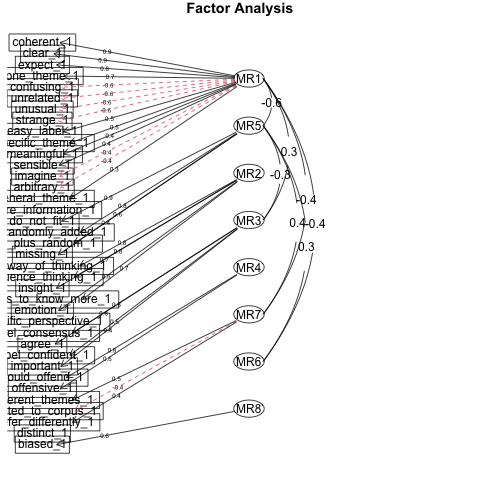

In [26]:
%%R -i tdf

library(psych) #loading fa (Factor Analysis library)
library(GPArotation)



efa.model <- fa(tdf,nfactors = 8,fm='minres',rotate='oblimin')#term aspect : 5
diagram(efa.model)
efa.model